**_EE479: Scientific Computing (Spring 2021)_** <br>

# <center> **Final Report** </center> <br>

**Name:** Andrés Brito (20205648) <br>
**Date:** June 22, 2021

In [104]:
# Libraries

import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

# **INTRODUCTION**

## **1. The FDTD Formulation**<br>
Reference: C. R. Paul, “Incorporation of Terminal Constraints in the FDTD Analysis of Transmission Lines,” IEEE Trans. Electromagn. Compat., vol. 36, no. 2, pp. 85–91, 1994, doi: 10.1109/15.293284.

- Two-conductor uniform transmission line. We assume lossy line incident electromagnetic field as its excitation in addition to lumped sources. <br> <br>
<center> $\frac{\partial}{\partial z}V(z,t) + l\frac{\partial}{\partial t}I(z,t) + r I(z,t) = V_{F}(z,t)$ <br> <br>
$\frac{\partial}{\partial z}I(z,t) + c\frac{\partial}{\partial t}V(z,t) + g V(z,t) = I_{F}(z,t)$ </center> <br> <br>
Where: <br>
$V_{F}$ and $I_{F}$ $\rightarrow$ Distribuited voltage and current sources produced by the incident field. <br>
$r$ $\rightarrow$ resistance per unit length. <br>
$l$ $\rightarrow$ inductance per unit length. <br>
$c$ $\rightarrow$ capacitance per unit length. <br>
$g$ $\rightarrow$ conductance per unit length. <br>

- Boundary Conditions. <br> <br>
<center> $V(0,t) = V_{s} - R_{s}I(0,t)$ <br> <br>
$V(\ell, t) = V_{L} + R_{L}I(\ell, t)$ </center> <br> <br>
Where: <br>
$\ell$ $\rightarrow$ length of the line. <br>
$V_{s,L}$ $\rightarrow$ source and load voltage. <br>
$R_{s, L}$ $\rightarrow$ source and load impedance. <br>

- In order to insure stability of the discretization and second-order accuracy, $N + 1$ voltage points and $N$ current points are needed. <br>
<center> $V_{1}, V_{2}, ..., V_{N}, V_{N+1}$ <br>
    $I_{1}, I_{2}, ..., I_{N}$ </center> <br>

- Use the second-order accurate center-difference formula with spatial step of $\frac{\Delta z}{2}$ and time step of $\frac{\Delta t}{2}$.

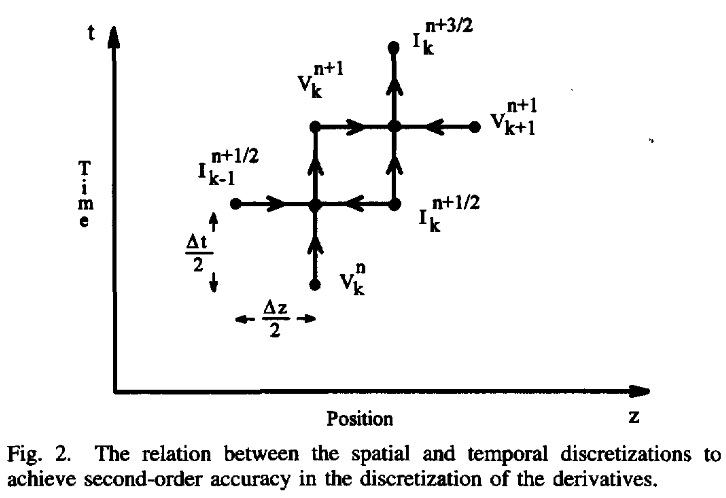

<center> $\frac{V^{n+1}_{k+1} - V^{n+1}_{k}}{\Delta z} + l \frac{I^{n+ 3/2}_{k} - I^{n+ 1/2}_{k}}{\Delta t} + r \frac{I^{n+ 3/2}_{k} + I^{n+ 1/2}_{k}}{2} = \frac{V_{F}^{n+ 3/2} + V_{F}^{n+ 1/2}}{2}$ <br> <br>
$\frac{I^{n+ 1/2}_{k} - I^{n+ 1/2}_{k-1}}{\Delta z} + c \frac{V^{n+1}_{k} - V^{n}_{k}}{\Delta t} + g \frac{V^{n+1}_{k} + V^{n}_{k}}{2} = \frac{I^{n+1}_{F} + I^{n}_{F}}{2}$ </center> <br>
Where $n$ and $k$ are integers.

The solution comes in a "bootstrapping" fashion. First the voltages along the line are solved for a fixed time in terms of the previous solutions. Then the currents are solved in terms of these and previous values. The solution starts with an initially relaxed line having zero voltage and current values.

### **1.a) Boundary Conditions:**

- Lumped source at $z = 0$ is characterized by: <br>
<center> $I_{s} = \frac{V_{s}}{R_{s}}$ </center> <br>
Where: <br>
$V_{s}$ $\rightarrow$ Voltage Source <br>
$R_{s}$ $\rightarrow$ Source Resistance <br> <br>
At $k = 1$, we will have the following conditions: <br>
<center> $I_{0} = 0$ <br> <br>
    $g = \frac{1}{R_{s} \Delta z}$ <br> <br>
    $I_{F} = \frac{V_{s}}{R_{s} \Delta z}$ <br>
</center> <br>

- Lumped load at $z = \ell$ is characterized by: <br>
<center> $I_{L} = \frac{V_{L}}{R_{L}}$ </center> <br>
Where: <br>
$V_{L}$ $\rightarrow$ Load Voltage <br>
$R_{L}$ $\rightarrow$ Load Resistance <br> <br>
At $k = N + 1$, we will have the following conditions: <br>
<center> $I_{N+1} = 0$ <br> <br>
    $g = \frac{1}{R_{L} \Delta z}$ <br> <br>
    $I_{F} = \frac{V_{L}}{R_{L} \Delta z}$ <br>
</center> <br>

- We also simplify the analysis by considering lossless lines: <br>
<center> $r = V_{F} = 0$ <br>
    $g = I_{F} = 0$ <br> </center>

### **1.b) Stability Condition:** <br>
The Courant-Friedrich-Lewy (CFL) condition stablishes that the time step cannot be greater than the propagation time over each cell. The $\Delta z$ discretization is chosen sufficiently small such that each $\Delta z$ section is electrically small at the significant spectral component of the source voltages. <br>
<center> $\Delta t \leq \frac{\Delta z}{v} $ </center> <br>
Where: <br>
$v$ $\rightarrow$ phase velocity of propagation on the line

### **1.c) Final Difference Equations:** 

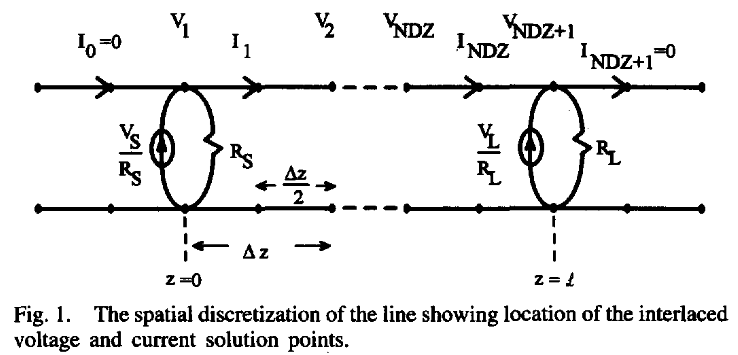

#### 1.c.1) Voltage:

- For $k = 1$: <br>
<center> $V^{n+1}_{1} = \left( R_{s} \frac{c}{2} \frac{\Delta z}{\Delta t} + \frac{1}{2} \right)^{-1} \left[ \left( R_{s} \frac{c}{2} \frac{\Delta z}{\Delta t} - \frac{1}{2} \right) V_{1}^{n} - R_{s} I_{1}^{n + 1/2} + \frac{V_{s}^{n+1} + V_{s}^{n}}{2} \right]$ <br> <br> 
</center>

- For $k = 2, 3, ..., N$: <br>
<center> $V^{n+1}_{k} = V^{n}_{k} - \frac{\Delta t}{\Delta z} c^{-1} \left( I_{k}^{n + 1/2} - I_{k-1}^{n + 1/2} \right)$ <br> 
</center>

- For $k = N + 1$: <br>
<center> $V^{n+1}_{N+1} = \left( R_{L} \frac{c}{2} \frac{\Delta z}{\Delta t} + \frac{1}{2} \right)^{-1} \left[ \left( R_{L} \frac{c}{2} \frac{\Delta z}{\Delta t} - \frac{1}{2} \right) V_{N+1}^{n} + R_{L} I_{N}^{n + 1/2} + \frac{V_{L}^{n+1} + V_{L}^{n}}{2} \right]$ <br> <br> 
</center>

#### 1.c.2) Current:

- For $k = 1, 2, 3, ..., N$: <br>
<center> $I^{n+ 3/2}_{k} = I^{n + 1/2}_{k} - \frac{\Delta t}{\Delta z} l^{-1} \left( V_{k+1}^{n+1} - V_{k}^{n+1} \right)$ <br> 
</center>

# **IMPLEMENTATION AND RESULTS**

## **2. FDTD Code Implementation**<br>

-  The CFL condiction in relation with the total number of point in space ($N$) and time ($M$): <br>
<center> $M \geq N \frac{v T_{f}}{\ell}$ </center> <br>
- The equality condition of the previous expression provide the so-called "magic steo time". This step time allows the calculation of the exact solution. This point will be clarified after the results are obtained.

In [134]:
"""
Determine the Total Number of Points in Time grid.

If we select the condition of equality (magic time step), we obtain the exact solution without considerable high frequency ringing.

v --> phase velocity
N --> total number of points in space grid
T_f --> simulation time
L --> Transmission Line length

Return M
"""
def Time_Mpoint(v, N, T_f, L, vrb = False):
    
    # Determine the number of points in the time grid (magical time step)
    M = N*int(v*T_f/L)
    
    if vrb:
        print(f'Number of Total Points in Time Grid: {M}\n')
    
    return M


"""
Determine the temporal and spatial time steps

M --> total number of points in time grid
N --> total number of points in space grid
T_f --> simulation time
L --> Transmission Line length

return dz, dt
"""
def g_step(M, N, T_f, L, vrb = False):
    
    # Spacing
    dz = L/N
    
    # Time step
    dt = T_f/M
    
    if vrb:
        print(f'Spatial Grid Spacing: {dz}\n')
        print(f'Time step: {dt}\n')
    
    return dz, dt

In [135]:
###############
# Spatial Grid
###############

# In Python, indexes start with 0. Hence, we need to change the grid limits to match with the indexes.

"""
Create spatial grid for Voltage and Current

For accuracy and stability E and H field solutions are not at the same point but staggered one half-cell apart

N --> total number of points in space grid
L --> Transmission Line length

Return --> v_gz and i_gz
"""
def space_grid(N, L, dz, vrb = False):
    
    # Voltage Spatial Grid has N+1 points
    v_gz = np.linspace(0, L, N+1)
    
    # Current Spatial Grid starts at dz/2 and has N points
    i_gz = np.linspace(0.5*dz, L-(0.5*dz), N)
    
    if vrb:
        print(f'Voltage Spatial Grid: \n {v_gz}')
        print(f'and shape {v_gz.shape} \n')
        print(f'Current Spatial Grid: \n {i_gz}')
        print(f'and shape {i_gz.shape} \n')
        
    return v_gz, i_gz

################
# Temporal Grid
################

"""
Create temporal grid for Voltage and Current

For accuracy and stability E and H field solutions are not at the same point but staggered one half-cell apart

M --> total number of points in time
T_f --> Simulation time

Return --> v_gt and i_gt
"""
def time_grid(M, T_f, dt, vrb = False):
    
    # Voltage Temporal Grid has M+1 points
    v_gt = np.linspace(0, T_f, M+1)
    
    # Current Temporal Grid starts at dt/2 and has M points
    i_gt = np.linspace(0.5*dt, T_f-(0.5*dt), M)
    
    if vrb:
        print(f'Voltage Temporal Grid: \n {v_gt}')
        print(f'and shape {v_gt.shape} \n')
        print(f'Current Temporal Grid: \n {i_gt}')
        print(f'and shape {i_gt.shape} \n')
        
    return v_gt, i_gt

In [136]:
# Source Voltage

"""
Generate the lumped source voltage considering the rise time (rt) of the signal

V_s --> Source Voltage
rt --> rise time (10-90 criterion)
dt --> time step
T_f --> Simulation time
M --> total number of points in time grid
Ideal --> No rise time signal

Return --> V_st
"""
def source_V(V_s, rt, dt, T_f, M, Ideal = True, vrb = False):
    
    # Initilize the signal
    V_st = V_s*np.ones(M+1)
    
    # Create an non-ideal signal --> rise time
    if not Ideal:
        # Define the time when the ramp ends
        t_3 = rt/0.8
        
        # Define the number of discrete points to replace with the ramp
        M_ramp = int(t_3/dt) + 1
        
        # Generate and replace the ramp values
        for i in range(M_ramp):
            V_st[i] = 0.8*(V_s/rt)*(i*dt)
            
    # Print the results for visual verification
    if vrb:
        print(f'Source Voltage: \n {V_st}')
        print(f'and shape: {V_st.shape}\n')
        
        # Simple plot
        
        # Get time grid
        v_gt, _ = time_grid(M, T_f, dt, vrb = False)
        
        # Set the plot --> size(width, height)
        fig1 = plt.figure(figsize=(10,8))

        plt.plot(v_gt, V_st, 'b', linewidth = 1.5)

        plt. title('Voltage Source Waveform', fontsize = 20)
        plt.xlabel('Time [s]', fontsize = 15)
        plt.ylabel('Voltage [V]', fontsize = 15)
        plt.grid()
        #plt.legend(['Trapezoidal', 'Midpoint'])

        plt.show()
    
    return V_st

In [137]:
##################################
# Voltage and Current Simulation
##################################

"""
Simulate a two-conductor transmission line (lossless)

v --> phase velocity
Z_0 --> characteristic impedance
R_s --> Source Impedance
R_L --> Load Impedance
V_s --> Source Voltage
rt --> rise time of source voltage
V_L --> Load Voltage

M --> total number of points in time grid
N --> total number of points in space grid
dz --> spacing
dt --> time step
T_f --> Simulation time

Idel --> not considering rt in the source voltage

Return --> V_TL and I_TL
"""
def TL_ll_simulation(v, Z_0, R_s, R_L, V_s, rt, V_L, M, N, dz, dt, T_f, Ideal = True, vrb = False):
    
    # Increase one more step of time simulation to compensate the repetition
    # of the 1st state
    M += 1
    T_f += dt
    
    # Calculte inductance (l_i) and capacitance (c_c) from the formulas
    # Phase velocity --> v = 1/sqrt(lc)
    # Characteristic impedance --> Z_0 = sqrt(l/c)
    c_c = 1/(v*Z_0)          # Capacitance
    l_i = 1/(c_c*(v**2))     # Inductance
        
    # TL initial conditions (t=0) --> Zero current and voltage
    V_0 = np.zeros(N+1)
    I_0 = np.zeros(N)
    
    # Initialize Voltage and Current results
    # Shallow copy to create an independent object
    V_TL = np.copy(V_0.reshape((-1,1)))
    I_TL = np.copy(I_0.reshape((-1,1)))
    
    ##########################################################################
    # After store the initial values in the final matrix, 
    # V_0 and I_0 will be used to hold the on-going results of the calculation
    ##########################################################################
    
    # Initialize Source and Load Voltages (only a function of time)
    V_st = source_V(V_s, rt, dt, T_f, M, Ideal = Ideal, vrb = vrb)
    
    V_Lt = V_L*np.ones(M+1)
    
    V_TL[0,0] = V_st[0] 
    
    # Common factor used in the following calculations
    c_aux = (c_c*dz)/(2*dt)
    
    # Iterate for all time points
    for n in range(M):
        
        # Iterate for all space points
        # The 1st and last point have different formulas
        for k in range(N+1):
            
            #################
            # Solving Voltage
            #################
            if k == 0:
                V_0[k] = (1/((R_s*c_aux) + 0.5))*((((R_s*c_aux) - 0.5)*V_TL[k,n]) 
                                                  - (R_s*I_TL[k,n]) + (0.5*(V_st[n+1] + V_st[n])))
                
            elif k == N:
                V_0[k] = (1/((R_L*c_aux) + 0.5))*((((R_L*c_aux) - 0.5)*V_TL[k,n]) 
                                                  + (R_L*I_TL[k-1,n]) + (0.5*(V_Lt[n+1] + V_Lt[n])))
            
            else:
                V_0[k] = V_TL[k][n] - ((dt/(dz*c_c))*(I_TL[k,n] - I_TL[k-1,n]))
                
            
            #################
            # Solving Current
            #################
            # Current vector only has N points
            # and it is calculated based on the two
            # previous voltages
            if k >= 1:
                
                # Calculate current element with modified index
                I_0[k-1] = I_TL[k-1,n] - ((dt/(dz*l_i))*(V_0[k] - V_0[k-1]))
        
        # Add the solution to the final matrix
        V_TL = np.concatenate((V_TL, V_0.reshape(-1,1)), axis = 1)
        
        # Current Matrix only has M columns
        if n < M-1:
            I_TL = np.concatenate((I_TL, I_0.reshape(-1,1)), axis = 1)
            
    if vrb:
        print(f'TL Capacitance: {c_c} [F]\n')
        print(f'TL Inductance: {l_i} [H]\n')
        
        print(f'Final Simulated Voltage: \n {V_TL}')
        print(f'and shape: {V_TL.shape}\n')
        
        print(f'Final Simulated Current: \n {I_TL}')
        print(f'and shape: {I_TL.shape}\n')

    return V_TL, I_TL

### **2.a) Lossless Two-conductor Transmission Line (Ideal Source):** <br>
- Simulate a lossless transmission line where the rise time of the voltage is not considered.

In [138]:
# Constants

L = 400 # length 400 [m]
v = 2e8 # phase velocity [m/s]
V_s = 30 # Source Voltage [V]
rt = 0.1e-6 # Rise time [s]
V_L = 0 # Load Voltage [V] --> Reference plane
Z_0 = 50 # Characteristic impedance [ohm]
R_s = 0 # Source Impedance [ohm]
R_L = 100 # Load Impedance [ohm]

# Simulation time [s]
T_f = 20e-6 

In [139]:
"""
Grid Points: 3 different cases (grid)
"""

# Space grid
N_l = [1, 200, 200]
# The 3rd still comply with the CFL criterion but as an inequality

In [140]:
# Define the grids for each case

# Empty list to store all the resuls
M_l = []
dz_l = []
dt_l = []
v_gz_l = []
i_gz_l = []
v_gt_l = []
i_gt_l = []

for i in range(len(N_l)):    
    
    # Calculate number of time points
    M = Time_Mpoint(v, N_l[i], T_f, L, vrb = True)
    
    # Duplicate the 3rd case values (inequality)
    if i == 2:
        M *= 2
        
    M_l.append(M)
    
    dz, dt = g_step(M, N_l[i], T_f, L, vrb = True)
    dz_l.append(dz)
    dt_l.append(dt)

    v_gz, i_gz = space_grid(N_l[i], L, dz, vrb = True)
    v_gz_l.append(v_gz)
    i_gz_l.append(i_gz)
    
    v_gt, i_gt = time_grid(M, T_f, dt, vrb = True)
    v_gt_l.append(v_gt)
    i_gt_l.append(i_gt)

Number of Total Points in Time Grid: 10

Spatial Grid Spacing: 400.0

Time step: 2.0000000000000003e-06

Voltage Spatial Grid: 
 [  0. 400.]
and shape (2,) 

Current Spatial Grid: 
 [200.]
and shape (1,) 

Voltage Temporal Grid: 
 [0.0e+00 2.0e-06 4.0e-06 6.0e-06 8.0e-06 1.0e-05 1.2e-05 1.4e-05 1.6e-05
 1.8e-05 2.0e-05]
and shape (11,) 

Current Temporal Grid: 
 [1.0e-06 3.0e-06 5.0e-06 7.0e-06 9.0e-06 1.1e-05 1.3e-05 1.5e-05 1.7e-05
 1.9e-05]
and shape (10,) 

Number of Total Points in Time Grid: 2000

Spatial Grid Spacing: 2.0

Time step: 1e-08

Voltage Spatial Grid: 
 [  0.   2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.
  28.  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.
  56.  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.
  84.  86.  88.  90.  92.  94.  96.  98. 100. 102. 104. 106. 108. 110.
 112. 114. 116. 118. 120. 122. 124. 126. 128. 130. 132. 134. 136. 138.
 140. 142. 144. 146. 148. 150. 152. 154. 156. 158. 160. 162. 164. 1

In [141]:
"""
Simulate 3 different cases (grid)
"""

# Empty lists to store the results
V_TL_l = []
I_TL_l = []

for j in range(len(N_l)):
    
    # Electric Constants
    electr_c = (v, Z_0, R_s, R_L, V_s, rt, V_L)

    # Grid Constants
    grid_c = (M_l[j], N_l[j], dz_l[j], dt_l[j], T_f)

    # Simulate the lossless Line
    V_TL, I_TL = TL_ll_simulation(*electr_c, *grid_c, Ideal = True, vrb = False)
    
    # Store the results
    V_TL_l.append(V_TL)
    I_TL_l.append(I_TL)

- Plot the results of the 3 grid cases:

In [142]:
# 1st Grid case: N = 1, M = 10 
v_1 = V_TL_l[0]
t_1 = v_gt_l[0]

# 1st Grid case: N = 200, M = 2000 
v_2 = V_TL_l[1]
t_2 = v_gt_l[1]

# 1st Grid case: N = 200, M = 400 (Inequality of the CFL condition) 
v_3 = V_TL_l[2]
t_3 = v_gt_l[2]

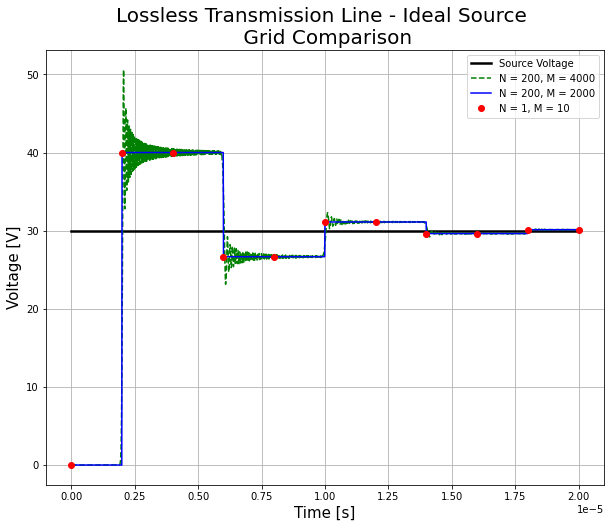

In [149]:
# Set the plot --> size(width, height)
fig1 = plt.figure(figsize=(10,8))

plt.plot(t_1, v_1[0,1:], 'k', label = 'Source Voltage' , linewidth = 2.5) 
plt.plot(t_3, v_3[-1,1:], '--g', label = 'N = 200, M = 4000' , linewidth = 1.5)
plt.plot(t_2, v_2[-1,1:], '-b', label = 'N = 200, M = 2000' , linewidth = 1.5)
plt.plot(t_1, v_1[-1,1:], 'ro', label = 'N = 1, M = 10' , linewidth = 1.5)


plt. title('Lossless Transmission Line - Ideal Source \n Grid Comparison', fontsize = 20)
plt.xlabel('Time [s]', fontsize = 15)
plt.ylabel('Voltage [V]', fontsize = 15)
plt.grid()
plt.legend()

plt.savefig("ideal_CFL.svg", format = "svg", dpi = 1200)

plt.show()

The previous figure showed the comparison of the results for three different grids. The green solution is the only one that does not use the "magic time step". Noticeable oscillations are part of this solution. For this case of ideal source, only the use of the magic step time guarantees an exact solution.

- The same transmission line is also simulated using a commercial software. Advanced Design System (ADS) from Keysight provided the transient response to compare with our result.

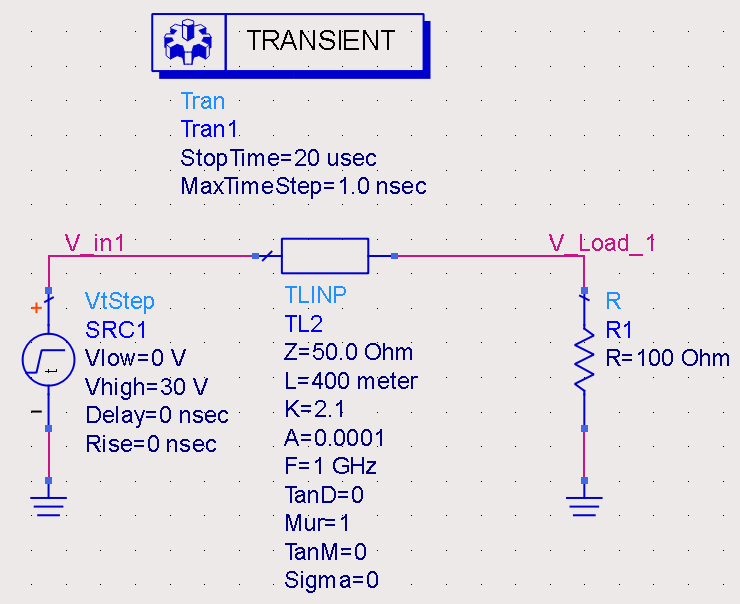

In [150]:
# Import the results from ADS results
data = pd.read_csv('ADS_result.csv')
print(data)

               time  V_Load_1  V_Load_2
0        0.000E0sec  0.000E0V  0.000E0V
1      1.000E-11sec  0.000E0V  0.000E0V
2      2.000E-11sec  0.000E0V  0.000E0V
3      5.000E-11sec  0.000E0V  0.000E0V
4      1.400E-10sec  0.000E0V  0.000E0V
...             ...       ...       ...
20003   2.000E-5sec  3.012E1V  3.012E1V
20004   2.000E-5sec  3.012E1V  3.012E1V
20005   2.000E-5sec  3.012E1V  3.012E1V
20006   2.000E-5sec  3.012E1V  3.012E1V
20007   2.000E-5sec  3.012E1V  3.012E1V

[20008 rows x 3 columns]


In [151]:
# Extract numerical values from each column

########
# Time
########

# Select all the rows
time = data.iloc[:,0]
# Separate the text and units
time = time.str.split(r"s", expand = True)
# Select only time
time = time.iloc[:,0]
# Get the values in an array
time = time.values
# Cast to float type and units [s]
time_ADS = time.astype(float)

print(f'ADS Simulation Time: \n {time_ADS}')
print(f'and shape: {time_ADS.shape} \n')

ADS Simulation Time: 
 [0.e+00 1.e-11 2.e-11 ... 2.e-05 2.e-05 2.e-05]
and shape: (20008,) 



In [152]:
###############
# Load Voltage
###############

# Select all the rows
volt = data.iloc[:,1]
# Separate the text and units
volt = volt.str.split(r"V", expand = True)
# Select only voltage
volt = volt.iloc[:,0]
# Get the values in an array
volt = volt.values
# Cast to float type and units [V]
VLoad_ADS =volt.astype(float)

print(f'ADS Simulation Result1: \n {VLoad_ADS}')
print(f'and shape: {VLoad_ADS.shape} \n')

ADS Simulation Result1: 
 [ 0.    0.    0.   ... 30.12 30.12 30.12]
and shape: (20008,) 



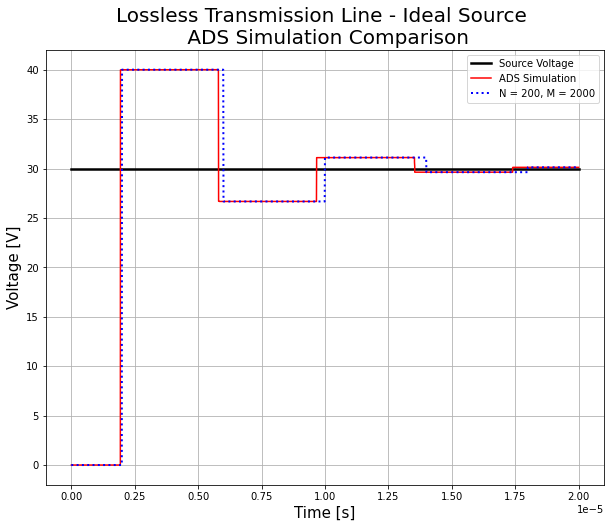

In [153]:
# Set the plot --> size(width, height)
fig1 = plt.figure(figsize=(10,8))

plt.plot(t_1, v_1[0,1:], 'k', label = 'Source Voltage' , linewidth = 2.5) 
plt.plot(time_ADS, VLoad_ADS, 'r', label = 'ADS Simulation' , linewidth = 1.5)
plt.plot(t_2, v_2[-1,1:], ':b', label = 'N = 200, M = 2000' , linewidth = 2)


plt. title('Lossless Transmission Line - Ideal Source \n ADS Simulation Comparison', fontsize = 20)
plt.xlabel('Time [s]', fontsize = 15)
plt.ylabel('Voltage [V]', fontsize = 15)
plt.grid()
plt.legend()

plt.savefig("ideal_ADS.svg", format = "svg", dpi = 1200)

plt.show()

As we can observe in the previous figure, the shape of both signals matched, but there is a phase shift. This shift becomes more evident as time goes on. A possible explanation for this is that FDTD method accumulates error as the simulation is performed.

### **2.b) Lossless Two-conductor Transmission Line (Real Source):** <br>
- Simulate a transmission line with a real voltage source where the rise time is considered.

In [154]:
# Constants

L = 400 # length 400 [m]
v = 2e8 # phase velocity [m/s]
V_s = 30 # Source Voltage [V]
rt = 0.1e-6 # Rise time [s]
V_L = 0 # Load Voltage [V] --> Reference plane
Z_0 = 50 # Characteristic impedance [ohm]
R_s = 0 # Source Impedance [ohm]
R_L = 100 # Load Impedance [ohm]

# Simulation time [s]
T_f = 20e-6 

In [155]:
"""
Grid Points: 3 different cases (grid)
"""

# Space grid
N_l = [1, 200, 200]
# The 3rd still comply with the CFL criterion but as an inequality

In [156]:
# Define the grids for each case

# Empty list to store all the resuls
M_l = []
dz_l = []
dt_l = []
v_gz_l = []
i_gz_l = []
v_gt_l = []
i_gt_l = []

for i in range(len(N_l)):    
    
    # Calculate number of time points
    M = Time_Mpoint(v, N_l[i], T_f, L, vrb = True)
    
    # Duplicate the 3rd case values (inequality)
    if i == 2:
        M *= 2
        
    M_l.append(M)
    
    dz, dt = g_step(M, N_l[i], T_f, L, vrb = True)
    dz_l.append(dz)
    dt_l.append(dt)

    v_gz, i_gz = space_grid(N_l[i], L, dz, vrb = True)
    v_gz_l.append(v_gz)
    i_gz_l.append(i_gz)
    
    v_gt, i_gt = time_grid(M, T_f, dt, vrb = True)
    v_gt_l.append(v_gt)
    i_gt_l.append(i_gt)

Number of Total Points in Time Grid: 10

Spatial Grid Spacing: 400.0

Time step: 2.0000000000000003e-06

Voltage Spatial Grid: 
 [  0. 400.]
and shape (2,) 

Current Spatial Grid: 
 [200.]
and shape (1,) 

Voltage Temporal Grid: 
 [0.0e+00 2.0e-06 4.0e-06 6.0e-06 8.0e-06 1.0e-05 1.2e-05 1.4e-05 1.6e-05
 1.8e-05 2.0e-05]
and shape (11,) 

Current Temporal Grid: 
 [1.0e-06 3.0e-06 5.0e-06 7.0e-06 9.0e-06 1.1e-05 1.3e-05 1.5e-05 1.7e-05
 1.9e-05]
and shape (10,) 

Number of Total Points in Time Grid: 2000

Spatial Grid Spacing: 2.0

Time step: 1e-08

Voltage Spatial Grid: 
 [  0.   2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.
  28.  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.
  56.  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.
  84.  86.  88.  90.  92.  94.  96.  98. 100. 102. 104. 106. 108. 110.
 112. 114. 116. 118. 120. 122. 124. 126. 128. 130. 132. 134. 136. 138.
 140. 142. 144. 146. 148. 150. 152. 154. 156. 158. 160. 162. 164. 1

In [157]:
"""
Simulate 3 different cases (grid)
"""

# Empty lists to store the results
V_TL_l = []
I_TL_l = []

for j in range(len(N_l)):
    
    # Electric Constants
    electr_c = (v, Z_0, R_s, R_L, V_s, rt, V_L)

    # Grid Constants
    grid_c = (M_l[j], N_l[j], dz_l[j], dt_l[j], T_f)

    # Simulate the lossless Line
    V_TL, I_TL = TL_ll_simulation(*electr_c, *grid_c, Ideal = False, vrb = False)
    
    # Store the results
    V_TL_l.append(V_TL)
    I_TL_l.append(I_TL)

- Plot the results of the 3 grid cases:

In [158]:
# 1st Grid case: N = 1, M = 10 
v_1 = V_TL_l[0]
t_1 = v_gt_l[0]

# 1st Grid case: N = 200, M = 2000 
v_2 = V_TL_l[1]
t_2 = v_gt_l[1]

# 1st Grid case: N = 200, M = 400 (Inequality of the CFL condition) 
v_3 = V_TL_l[2]
t_3 = v_gt_l[2]

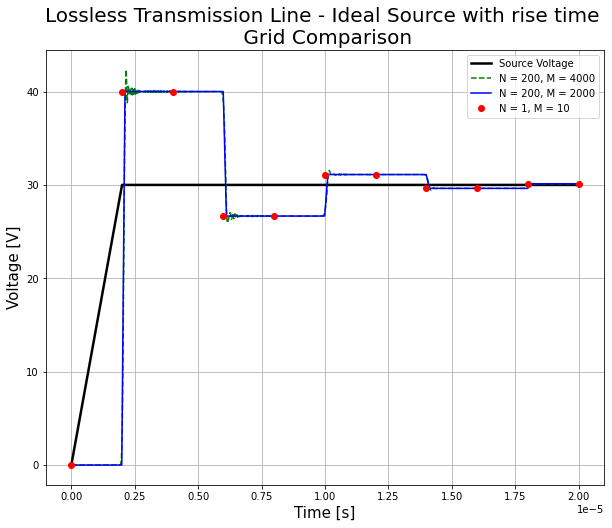

In [159]:
# Set the plot --> size(width, height)
fig1 = plt.figure(figsize=(10,8))

plt.plot(t_1, v_1[0,:-1], 'k', label = 'Source Voltage' , linewidth = 2.5) 
plt.plot(t_3, v_3[-1,1:], '--g', label = 'N = 200, M = 4000' , linewidth = 1.5)
plt.plot(t_2, v_2[-1,1:], '-b', label = 'N = 200, M = 2000' , linewidth = 1.5)
plt.plot(t_1, v_1[-1,1:], 'ro', label = 'N = 1, M = 10' , linewidth = 1.5)


plt. title('Lossless Transmission Line - Ideal Source with rise time \n Grid Comparison', fontsize = 20)
plt.xlabel('Time [s]', fontsize = 15)
plt.ylabel('Voltage [V]', fontsize = 15)
plt.grid()
plt.legend()

plt.savefig("real_CFL.svg", format = "svg", dpi = 1200)

plt.show()

From the previous results using three different grids, the green result shows how much affect the use of a time step different from the magic one. However, in this case since the source has a lower spectral component (less number of frequencies are required to represent a ramp function), the oscillations are also lower during the transition. For this kind of sources, the FDTD method can work even if the magic step time is not considered.

- As in the previous case, ADS results are obtained to compare the perfomance of FDTD method.

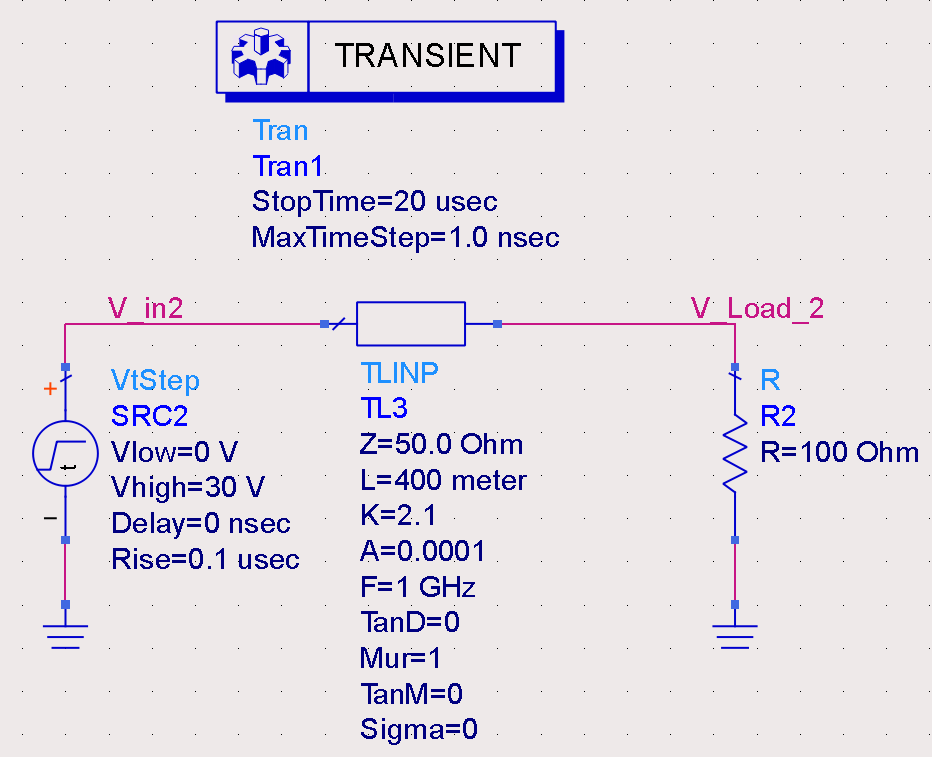

In [160]:
# Import the results from ADS
data = pd.read_csv('ADS_result.csv')
print(data)

               time  V_Load_1  V_Load_2
0        0.000E0sec  0.000E0V  0.000E0V
1      1.000E-11sec  0.000E0V  0.000E0V
2      2.000E-11sec  0.000E0V  0.000E0V
3      5.000E-11sec  0.000E0V  0.000E0V
4      1.400E-10sec  0.000E0V  0.000E0V
...             ...       ...       ...
20003   2.000E-5sec  3.012E1V  3.012E1V
20004   2.000E-5sec  3.012E1V  3.012E1V
20005   2.000E-5sec  3.012E1V  3.012E1V
20006   2.000E-5sec  3.012E1V  3.012E1V
20007   2.000E-5sec  3.012E1V  3.012E1V

[20008 rows x 3 columns]


In [161]:
# Extract numerical values from each column

########
# Time
########

# Select all the rows
time = data.iloc[:,0]
# Separate the text and units
time = time.str.split(r"s", expand = True)
# Select only time
time = time.iloc[:,0]
# Get the values in an array
time = time.values
# Cast to float type and units [s]
time_ADS = time.astype(float)

print(f'ADS Simulation Time: \n {time_ADS}')
print(f'and shape: {time_ADS.shape} \n')

ADS Simulation Time: 
 [0.e+00 1.e-11 2.e-11 ... 2.e-05 2.e-05 2.e-05]
and shape: (20008,) 



In [162]:
###############
# Load Voltage
###############

# Select all the rows
volt = data.iloc[:,2]
# Separate the text and units
volt = volt.str.split(r"V", expand = True)
# Select only voltage
volt = volt.iloc[:,0]
# Get the values in an array
volt = volt.values
# Cast to float type and units [V]
VLoad_ADS =volt.astype(float)

print(f'ADS Simulation Result1: \n {VLoad_ADS}')
print(f'and shape: {VLoad_ADS.shape} \n')

ADS Simulation Result1: 
 [ 0.    0.    0.   ... 30.12 30.12 30.12]
and shape: (20008,) 



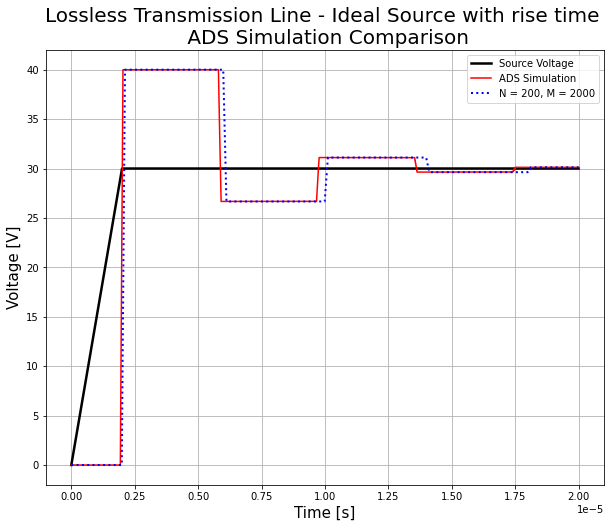

In [163]:
# Set the plot --> size(width, height)
fig1 = plt.figure(figsize=(10,8))

plt.plot(t_1, v_1[0,:-1], 'k', label = 'Source Voltage' , linewidth = 2.5)
plt.plot(time_ADS, VLoad_ADS, 'r', label = 'ADS Simulation' , linewidth = 1.5)
plt.plot(t_2, v_2[-1,1:], ':b', label = 'N = 200, M = 2000' , linewidth = 2)


plt. title('Lossless Transmission Line - Ideal Source with rise time \n ADS Simulation Comparison', fontsize = 20)
plt.xlabel('Time [s]', fontsize = 15)
plt.ylabel('Voltage [V]', fontsize = 15)
plt.grid()
plt.legend()

plt.savefig("real_ADS.svg", format = "svg", dpi = 1200)

plt.show()

The same problem is evident in the previous figure. As the simulation time increases, the phase shift is more evident. However, the shape of the signals is still in agreement.

# **CONCLUSIONS** <br>
- FDTD method provides an intuitive implementation to solve Telegrapher’s equation by discretizing the PDEs in space and time. <br>
- To solve these equations using FDTD, it is neccesary to interlace voltage and current solution points in space and time. <br>
- For Telegrapher’s equation, its boundary conditions need to consider not only source and load voltage but also source and load impedance. <br>
- The solution of the FDTD method shows agreement with the expected behavior of the load voltage, but its accumulation of errors is evident when compare with ADS results.

# **FURTHER WORK** <br>
- The application of the FDTD method for multiconductor case to calculate crosstalk. This application is still under construction but there some problems to overcome.

## **3. FDTD Algorithm for Multiconductor Case (Further Work)**<br>

The original expression can be extended to matrix form in order to simulate the interaction between conductors with the same return path (cross talk).

- For $k = 1$: <br>
<center> $\mathbf{V^{n+1}_{1}} = \left( \mathbf{R_{s}} \mathbf{C} \frac{\Delta z}{\Delta t} + \mathbf{1} \right)^{-1} \left[ \left( \mathbf{R_{s}} \mathbf{C} \frac{\Delta z}{\Delta t} - \mathbf{1} \right) \mathbf{V_{1}^{n}} - 2 \mathbf{R_{s}} \mathbf{I_{1}^{n + 1/2}} + \mathbf{V_{s}^{n+1}} + \mathbf{V_{s}^{n}} \right]$ <br> <br> 
</center>

- For $k = 2, 3, ..., N$: <br>
<center> $\mathbf{V^{n+1}_{k}} = \mathbf{V^{n}_{k}} - \frac{\Delta t}{\Delta z} \mathbf{C^{-1}} \left( \mathbf{I_{k}^{n + 1/2}} - \mathbf{I_{k-1}^{n + 1/2}} \right)$ <br> 
</center>

- For $k = N + 1$: <br>
<center> $\mathbf{V^{n+1}_{N+1}} = \left( \mathbf{R_{L}} \mathbf{C} \frac{\Delta z}{\Delta t} + \mathbf{1} \right)^{-1} \left[ \left( \mathbf{R_{L}} \mathbf{C} \frac{\Delta z}{\Delta t} - \mathbf{1} \right) \mathbf{V_{N+1}^{n}} + 2 \mathbf{R_{L} I_{N}^{n + 1/2}} + \mathbf{V_{L}^{n+1}} + \mathbf{V_{L}^{n}} \right]$ <br> <br> 
</center>

- For $k = 1, 2, 3, ..., N$: <br>
<center> $\mathbf{I^{n+ 3/2}_{k}} = \mathbf{I^{n + 1/2}_{k}} - \frac{\Delta t}{\Delta z} \mathbf{L^{-1}} \left( \mathbf{V_{k+1}^{n+1}} - \mathbf{V_{k}^{n+1}} \right)$ <br> 
</center>

### **3.a) Code Implementation for Matrix Calculations:**

In [ ]:
##################################
# Voltage and Current Simulation
# for multiple lines
##################################

"""
Simulate a multiple conductor transmission line (lossless)
We only consider two conductors with the same return path

line 0: return path
line 1: victim
line 2: aggressor


R_sm --> Source Impedance Matrix
R_Lm --> Load Impedance Matrix
C_m --> Capcitance Matrix
L_m --> Inductance Matrix
V_s --> Source Voltage
rt --> rise time of source voltage
V_L --> Load Voltage

M --> total number of points in time grid
N --> total number of points in space grid
dz --> spacing
dt --> time step
T_f --> Simulation time

Idel --> not considering rt in the source voltage

Return --> V_TL and I_TL
"""
def multiTL_simulation(R_sm, R_Lm, C_m, L_m, V_s, rt, V_L, M, N, dz, dt, T_f, Ideal = True, vrb = False):
    
    # Increase one more step of time simulation to compensate the repetition
    # of the 1st state
    #M += 1
    #T_f += dt
    
    # Number of conductors
    n_c = 2
        
    # TL initial conditions (t=0) --> Zero current and voltage
    
    V_0 = np.zeros((n_c, N+1))
    I_0 = np.zeros((n_c, N))
    
    
    # We need 3 dimensions to store the results for each conductor
    # We use concatenate, with this function the values of the new
    # array are independent from the original (no shallow copy needed)
   
    V_TL = np.concatenate((V_0[0,:].reshape((1, -1, 1)), 
                           V_0[0,:].reshape((1, -1, 1))), axis = 0)
    
    I_TL = np.concatenate((I_0[0,:].reshape((1, -1, 1)), 
                           I_0[0,:].reshape((1, -1, 1))), axis = 0)
    
    ##########################################################################
    # After store the initial values in the final matrix, 
    # V_0 and I_0 will be used to hold the on-going results of the calculation
    ##########################################################################
    
    # Initialize Source and Load Voltages (only a function of time)
    V_st = source_V(V_s, rt, dt, T_f, M, Ideal = Ideal, vrb = vrb)
    
    V_Lt = V_L*np.ones(M+1)
    
    # Only the line 2 (rightmost line) has a source connected to it (aggressor)
    #V_TL[1,0,0] = 0.5*V_st[0] 
    
    # The Sorce and Load Voltages are represented as matrices
    V_sm = np.concatenate((np.zeros_like(V_st.reshape((1,-1))), 
                           V_st.reshape((1,-1))), axis = 0)     # Line 2: Voltage Source
    V_Lm = np.concatenate((V_Lt.reshape((1,-1)), 
                           V_Lt.reshape((1,-1))), axis = 0)
    
    # Common factor used in the following calculations
    r_aux = dz/dt
    
    # Iterate for all time points
    for n in range(M):
        
        # Iterate for all space points
        # The 1st and last point have different formulas
        for k in range(N+1):
            
            #################
            # Solving Voltage
            #################
            if k == 0:
                # Recover voltage and current from the 3D matrix solution
                V_n_1 = np.array([[V_TL[0,k,n]], [V_TL[1,k,n]]])
                I_n5_1 = np.array([[I_TL[0,k,n]], [I_TL[1,k,n]]])
                
                V_0[:,k] = (np.linalg.inv((r_aux*(R_sm@C_m)) + 1)@((((r_aux*(R_sm@C_m)) - 1)@V_n_1) 
                                    - (2*(R_sm@I_n5_1)) 
                                    + (V_sm[:,n+1].reshape((-1,1)) 
                                       + V_sm[:,n].reshape((-1,1))))).flatten()
                
            elif k == N:
                # Recover voltage and current from the 3D matrix solution
                V_n1_1 = np.array([[V_TL[0,k,n]], [V_TL[1,k,n]]])
                I_n5_2 = np.array([[I_TL[0,k-1,n]], [I_TL[1,k-1,n]]])
                
                V_0[:,k] = (np.linalg.inv((r_aux*(R_Lm@C_m)) + 1)@((((r_aux*(R_Lm@C_m)) - 1)@V_n1_1) 
                                    + (2*(R_Lm@I_n5_2)) 
                                    + (V_Lm[:,n+1].reshape((-1,1)) 
                                       + V_Lm[:,n].reshape((-1,1))))).flatten()
            
            else:
                # Recover voltage and currents from the 3D matrix solution
                V_n_k = np.array([[V_TL[0,k,n]], [V_TL[1,k,n]]])
                I_n5_k = np.array([[I_TL[0,k,n]], [I_TL[1,k,n]]])
                I_n5_k1 = np.array([[I_TL[0,k-1,n]], [I_TL[1,k-1,n]]])
                
                V_0[:,k] = (V_n_k - (r_aux*np.linalg.inv(C_m)@(I_n5_k + I_n5_k1))).flatten()
                
            
            #################
            # Solving Current
            #################
            # Current vector only has N points
            # and it is calculated based on the two previous voltages
            
            if k >= 1:
                
                # Recover the current from the 3D matrix solution
                I_n5_k = np.array([[I_TL[0,k-1,n]], [I_TL[1,k-1,n]]])
                
                # Calculate current element with modified index
                I_0[:,k-1] = (I_n5_k - (r_aux*np.linalg.inv(L_m)@(V_0[:,k].reshape((-1,1)) 
                                        + V_0[:,k-1].reshape((-1,1))))).flatten()
        
        
        # Reshape the results to concatenate in the last matrix
        V_aux = np.concatenate((V_0[0,:].reshape((1,-1,1)), V_0[1,:].reshape((1,-1,1))), axis = 0)
        I_aux = np.concatenate((I_0[0,:].reshape((1,-1,1)), I_0[1,:].reshape((1,-1,1))), axis = 0)
        
        # Add the solution to the final 3D matrix
        V_TL = np.concatenate((V_TL, V_aux), axis = 2)
        
        # Current Matrix only has M columns
        if n < M-1:
            I_TL = np.concatenate((I_TL, I_aux), axis = 2)
            
    if vrb:
        
        print(f'Final Simulated Voltage: \n {V_TL}')
        print(f'and shape: {V_TL.shape}\n')
        
        print(f'Final Simulated Current: \n {I_TL}')
        print(f'and shape: {I_TL.shape}\n')

    return V_TL, I_TL

### **3.b) Three-conductor problem** <br>
- The model was implemented, but there are still some problems to obtain a stable output. More work is necessary to overcome this problem.

In [80]:
# Constants

L = 0.254 # length [m]

# Two Mode Velocities
# we use the smaller, v1
v1 = 1.80065e8 # phase velocity [m/s]
v2 = 1.92236e8 # phase velocity [m/s]

# Voltage source is represented as a column vector
V_s = 1 # Source Voltage [V]
rt = 6.25e-9 # Rise time [s]

# Load Voltage is also represented as a column vector
V_L = 0 # Load Voltage [V] --> Reference plane

# Source and Load Impedance are represented as matrixes 
R_s = 50 # Source Impedance [ohm]
R_L = 50 # Load Impedance [ohm]

R_sm = R_s*np.identity(2)
print(f'Source Impedance Matrix: \n {R_sm}')
print(f'and shape: {R_sm.shape} \n')
R_Lm = R_L*np.identity(2)
print(f'Load Impedance Matrix: \n {R_Lm}')
print(f'and shape: {R_Lm.shape} \n')

# Simulation time [s]
T_f = 40e-9 

# Per-unit-length Capacitance and Inductance Matrices
C_m = (1e-12)*np.array([[40.6280, -20.3140], [-20.3140, 29.7632]])
print(f'Capcitance Matrix: \n {C_m}')
print(f'and shape: {C_m.shape} \n')

L_m = (1e-6)*np.array([[1.10418, 0.690094], [0.690094, 1.38019]])
print(f'Inductance Matrix: \n {L_m}')
print(f'and shape: {L_m.shape} \n')

# Grid Points
N = 2 # Space grid

M = Time_Mpoint(v2, N, T_f, L, vrb = True)
dz, dt = g_step(M, N, T_f, L, vrb = True)

v_gz, i_gz = space_grid(N, L, dz, vrb = True)
v_gt, i_gt = time_grid(M, T_f, dt, vrb = True)


# Electric Constants
electr_c = (R_sm, R_Lm, C_m, L_m, V_s, rt, V_L)

# Grid Constants
grid_c = (M, N, dz, dt, T_f)

In [ ]:
# Simulate the lossless Line
V_TL, I_TL = multiTL_simulation(*electr_c, *grid_c, Ideal = True, vrb = True)

In [ ]:
# Simple plot
        
# Set the plot --> size(width, height)
fig1 = plt.figure(figsize=(10,8))

plt.plot(v_gt, V_TL[1,0,:], '--b', v_gt, V_TL[0,0,:], 'r', linewidth = 1.5)

plt. title('Voltages', fontsize = 20)
plt.xlabel('Time [s]', fontsize = 15)
plt.ylabel('Voltage [V]', fontsize = 15)
plt.grid()
plt.legend(['Source', 'Near-End Victim'])

plt.show()